<div align="left">
  <font size="5"><b>🐸 ¿Mi Target está mal definido?</b></font><br>
  <font size="3">
    <b>3 Señales Rápidas para Identificarlo </b><i><b>(Y Corregirlo)</b></i>
  </font>
</div>

<br>

<div align="left">
  <b>Dr. Alan López</b><br>
  Tiempo: 10 minutos <br>
  Nivel: Práctico e Inmediato
</div>

<br>

| [![FuzzyFrog.ai](https://img.shields.io/badge/FuzzyFrog.ai-8DD941?style=for-the-badge&logoColor=white)](https://fuzzyfrog.ai/) | [![Facebook](https://img.shields.io/badge/Facebook-1877F2?style=for-the-badge&logo=facebook&logoColor=white)](https://www.facebook.com/AlanLopezMachineLearning) | [![LinkedIn](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/alan-l%C3%B3pez-senior-ml-engineer-product-researcher/) | [![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/FuzzyFrogAI/) |
| --- | --- | --- | --- |

<br>

<font size="4"><b>¿$500K perdidos por un target mal definido?</b></font>

- <font size="3"><b>Tu misión hoy:</b></font> Diagnosticar el target en <b>3 clicks</b> usando herramientas interactivas.  
<br>


<div>
  <font size="3"><b>Lo que descubrirás en 10 minutos:</b></font>
  <br>

  &nbsp;&nbsp;&nbsp;
  <img src="https://raw.githubusercontent.com/FuzzyFrogAI/images/refs/heads/main/bullets.svg" width="16">
  Cómo detectar si tu target está mal definido.
  <br>

  &nbsp;&nbsp;&nbsp;
  <img src="https://raw.githubusercontent.com/FuzzyFrogAI/images/refs/heads/main/bullets.svg" width="16">
  Las 3 señales rápidas que usan los ingenieros senior.
  <br>

  &nbsp;&nbsp;&nbsp;
  <img src="https://raw.githubusercontent.com/FuzzyFrogAI/images/refs/heads/main/bullets.svg" width="16">
  Qué corregir primero para mejorar un modelo sin reentrenar.
  <br>

  &nbsp;&nbsp;&nbsp;
  <img src="https://raw.githubusercontent.com/FuzzyFrogAI/images/refs/heads/main/bullets.svg" width="16">
  Cómo evitar pérdidas silenciosas en regresión.
</div>


---

## 🚨 El Caso:

Una empresa manufacturera desplegó un modelo de regresión para predecir producción diaria.

**Timeline del desastre:**

| Fecha | Evento | Accuracy |
|-------|--------|----------|
| Ene 2020 | 🚀 Deploy | 92% ✅ |
| Mar 2020 | 📊 Primeros fallos | 85% ⚠️ |
| Jun 2020 | 💥 Crisis total | 63% ❌ |
| **Costo** | **Pérdidas** | **$500K** |

**¿El culpable?** El target estaba mal definido desde el inicio.

---
<br>

## 🎮 Modo interactivo:

Este NO es un tutorial teórico. Es un **diagnóstico en vivo** de tu modelo.

### ✅ Lo que harás:

1. **Cargar datos** → 1 celda
2. **Ejecutar 3 herramientas** → 3 clicks
3. **Ver diagnóstico visual** → Instantáneo
4. **Obtener reporte PDF** → Automático


---
<br>

## 📦 Herramientas que usarás:

- 🔧 **DRIFT Detector** → PSI automático con semáforo
- 🔧 **Granularity Scanner** → Encuentra registros mezclados
- 🔧 **Change Point Hunter** → Identifica quiebres estructurales


<br>

## ⏩ Inicio del Código

### 1.1 Setup

In [ ]:
# PASO 0: Setup Turbo (30 segundos)

import warnings
warnings.filterwarnings('ignore')

# Instalación silenciosa y rápida
import subprocess
import sys

print("🔧 Instalando herramientas de diagnóstico...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "ruptures"])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import ruptures as rpt

# Configuración visual pro
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✔️ Setup completo!")


🔧 Instalando herramientas de diagnóstico...
✔️ Setup completo!


### 1.2 Carga de datos

In [ ]:
import pandas as pd

# Cargar el CSV desde GitHub (lee la columna 'date' como fecha)
url = "https://raw.githubusercontent.com/FuzzyFrogAI/Laboratories/refs/heads/main/misdefined-target/target_drift_dataset.csv"
df = pd.read_csv(url, parse_dates=["date"])

# Resumen general
print("Datos cargados correctamente")
print("\nResumen:")
print(f"   • Registros totales: {len(df)}")
print(f"   • Rango temporal: {df['date'].min().date()} → {df['date'].max().date()}")
print(f"   • Target: {df['target'].min():.1f} – {df['target'].max():.1f}")
print("\n" + "="*60)
print("Dataset listo para diagnóstico")
print("="*60)

# Vista previa con estilo (muestra las primeras 3 filas)
df.head(3).style.set_properties(**{
    'background-color': '#e3f2fd',
    'color': '#1565c0',
    'border-color': '#90caf9'
})


Datos cargados correctamente

Resumen:
   • Registros totales: 1582
   • Rango temporal: 2020-01-01 → 2024-04-30
   • Target: 0.1 – 135.2

Dataset listo para diagnóstico


,date,operating_hours,num_stops,equipment_age,target,record_type
0,2020-01-01 00:00:00,13.992642,0,3.997442,16.359273,DAILY
1,2020-01-02 00:00:00,23.211429,0,14.250213,1.346988,DAILY
2,2020-01-03 00:00:00,19.711903,1,9.375854,4.630695,DAILY


### 📦 Herramientas

#### 🔧 Herramienta #1: drift detector

<div style="background: linear-gradient(135deg, #6CC733 0%, #0A6F47 100%); padding: 25px; border-radius: 15px; color: white; margin: 20px 0;">

## 🎯 ¿Qué hace?

Detecta si tu distribución cambió con el tiempo usando **PSI (Population Stability Index)**.

### 📚 Paper de referencia:
**Ackerman et al. (2021)** - [Automatically detecting data drift in ML classifiers](https://arxiv.org/pdf/2111.05672)

### 🚦 Semáforo de DRIFT:
- 🟢 **PSI < 0.1** → Estable
- 🟡 **PSI 0.1-0.2** → Monitorear
- 🔴 **PSI > 0.2** → ¡DRIFT CRÍTICO!

</div>

### ⚡ UN SOLO CLICK para diagnosticar:

Iniciando análisis de drift...
Analizando distribuciones temporales...



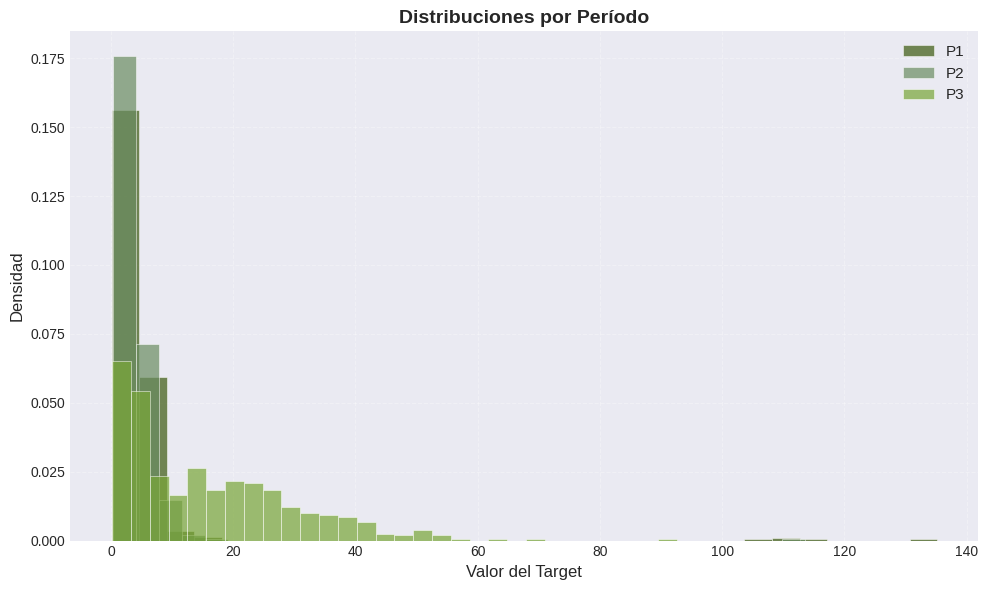

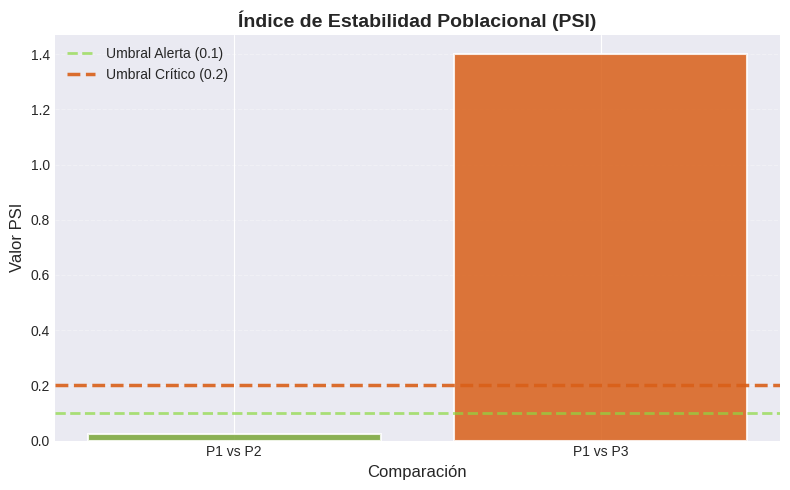

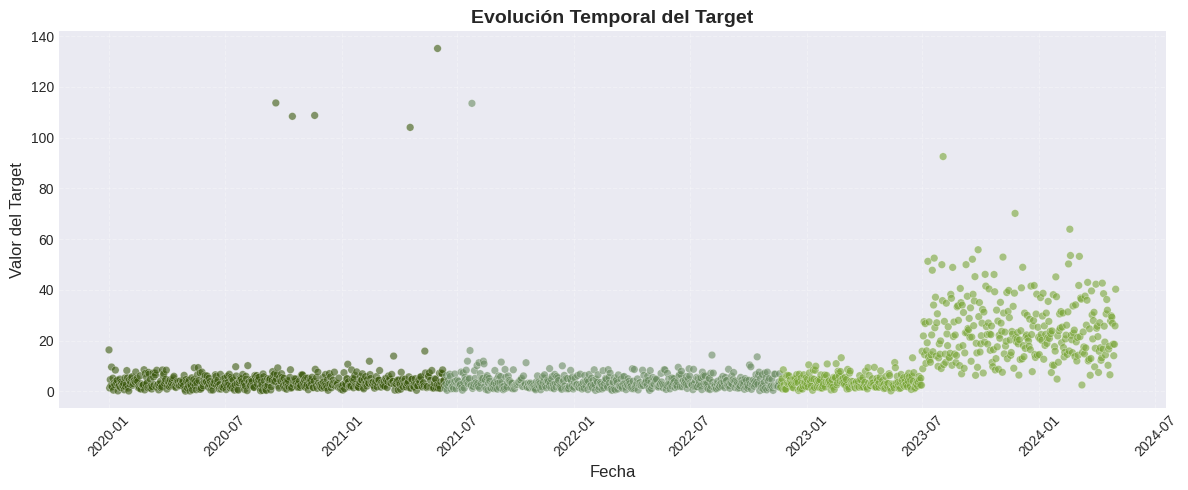

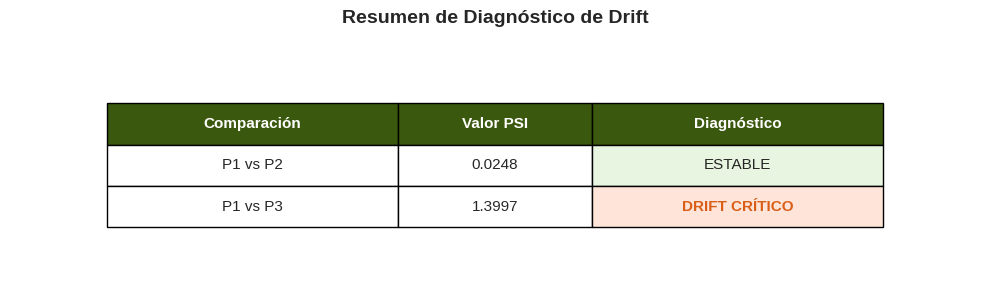


⚠️  ALERTA: Se detectó drift crítico
   P1 vs P3: PSI = 1.400

📊 RECOMENDACIÓN:
   El modelo fue entrenado con datos que difieren significativamente
   de los datos actuales. Se recomienda re-entrenar con datos recientes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def drift_detector_pro(df, target_col="target", n_periods=3):
    """
    Herramienta de diagnóstico de drift en datos temporales.

    Parámetros:
    - df: DataFrame con los datos
    - target_col: nombre de la columna objetivo
    - n_periods: número de períodos para dividir los datos
    """

    # PALETA DE COLORES PERSONALIZADA
    COLOR_ESTABLE = '#79A637'      # Verde medio - Estado estable
    COLOR_ALERTA = '#8DD941'       # Verde claro - Alerta moderada
    COLOR_CRITICO = '#D95F18'      # Naranja - ÚNICO color de resaltado para crítico
    COLOR_BASELINE = '#3B590E'     # Verde oscuro - Período baseline
    COLOR_ACCENT = '#6A8C61'       # Verde grisáceo - Acento/complementario

    # Dividir datos en períodos temporales
    df['periodo'] = pd.cut(df.index, bins=n_periods,
                          labels=[f'P{i+1}' for i in range(n_periods)])

    # Función para calcular PSI (Population Stability Index)
    def calculate_psi(baseline, current, bins=10, eps=1e-6):
        """
        Calcula el PSI entre dos distribuciones.
        PSI < 0.1: Sin cambios significativos
        PSI 0.1-0.2: Cambio moderado
        PSI > 0.2: Cambio significativo (drift crítico)
        """
        # Crear bins basados en los cuantiles del baseline
        edges = np.quantile(baseline, np.linspace(0, 1, bins + 1))
        edges = np.unique(edges)

        # Contar observaciones en cada bin
        baseline_counts, _ = np.histogram(baseline, bins=edges)
        current_counts, _ = np.histogram(current, bins=edges)

        # Calcular proporciones (añadiendo epsilon para evitar divisiones por cero)
        baseline_prop = (baseline_counts + eps) / (baseline_counts.sum() + eps * len(baseline_counts))
        current_prop = (current_counts + eps) / (current_counts.sum() + eps * len(current_counts))

        # Calcular PSI
        psi = np.sum((baseline_prop - current_prop) * np.log(baseline_prop / current_prop))
        return psi

    # Calcular PSI comparando cada período con el baseline (primer período)
    periodos = df['periodo'].unique()
    baseline = df[df['periodo'] == periodos[0]][target_col].values

    results = []
    for p in periodos[1:]:
        current = df[df['periodo'] == p][target_col].values
        psi = calculate_psi(baseline, current)

        # Clasificar según umbral de PSI con paleta personalizada
        if psi < 0.1:
            status = "ESTABLE"
            color = COLOR_ESTABLE
        elif psi < 0.2:
            status = "ALERTA"
            color = COLOR_ALERTA
        else:
            status = "DRIFT CRÍTICO"
            color = COLOR_CRITICO  # Naranja solo para crítico

        results.append({
            'Comparación': f'P1 vs {p}',
            'PSI': psi,
            'Status': status,
            'Color': color
        })

    # VISUALIZACIÓN 1: Distribuciones por período
    plt.figure(figsize=(10, 6))
    period_colors = [COLOR_BASELINE, COLOR_ACCENT, COLOR_ESTABLE]

    for i, periodo in enumerate(periodos):
        data = df[df['periodo'] == periodo][target_col]
        plt.hist(data, bins=30, alpha=0.7, label=periodo,
                color=period_colors[i], density=True, edgecolor='white', linewidth=0.5)

    plt.title('Distribuciones por Período', fontsize=14, fontweight='bold')
    plt.xlabel('Valor del Target', fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN 2: Valores de PSI
    plt.figure(figsize=(8, 5))
    comparaciones = [r['Comparación'] for r in results]
    psi_values = [r['PSI'] for r in results]
    bar_colors = [r['Color'] for r in results]

    bars = plt.bar(comparaciones, psi_values, color=bar_colors, alpha=0.85,
                   edgecolor='white', linewidth=1.5)

    # Líneas de referencia para umbrales
    plt.axhline(y=0.1, color=COLOR_ALERTA, linestyle='--', linewidth=2,
                label='Umbral Alerta (0.1)', alpha=0.7)
    plt.axhline(y=0.2, color=COLOR_CRITICO, linestyle='--', linewidth=2.5,
                label='Umbral Crítico (0.2)', alpha=0.9)

    plt.title('Índice de Estabilidad Poblacional (PSI)', fontsize=14, fontweight='bold')
    plt.ylabel('Valor PSI', fontsize=12)
    plt.xlabel('Comparación', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN 3: Timeline del target
    plt.figure(figsize=(12, 5))
    periodo_colors_map = {
        periodos[0]: COLOR_BASELINE,
        periodos[1]: COLOR_ACCENT,
        periodos[2]: COLOR_ESTABLE
    }
    periodo_colors = df['periodo'].map(periodo_colors_map)

    plt.scatter(df['date'], df[target_col], c=periodo_colors, alpha=0.6, s=30,
                edgecolors='white', linewidth=0.3)
    plt.title('Evolución Temporal del Target', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Valor del Target', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN 4: Tabla resumen
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.axis('tight')
    ax.axis('off')

    table_data = [[r['Comparación'], f"{r['PSI']:.4f}", r['Status']] for r in results]
    table = ax.table(cellText=table_data,
                    colLabels=['Comparación', 'Valor PSI', 'Diagnóstico'],
                    cellLoc='center', loc='center',
                    colWidths=[0.3, 0.2, 0.3])

    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2.5)

    # Colorear celdas según diagnóstico - tonos más suaves para tabla
    color_map = {
        COLOR_ESTABLE: '#e8f5e0',   # Verde claro suave
        COLOR_ALERTA: '#f0fcd4',    # Verde lima muy suave
        COLOR_CRITICO: '#ffe5d9'    # Naranja muy suave - RESALTADO
    }

    for i, r in enumerate(results, start=1):
        table[(i, 2)].set_facecolor(color_map[r['Color']])
        # Hacer texto del status crítico más prominente
        if 'CRÍTICO' in r['Status']:
            table[(i, 2)].set_text_props(weight='bold', color=COLOR_CRITICO)

    # Colorear encabezados
    for i in range(3):
        table[(0, i)].set_facecolor(COLOR_BASELINE)
        table[(0, i)].set_text_props(weight='bold', color='white')

    plt.title('Resumen de Diagnóstico de Drift', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Imprimir diagnóstico en consola
    critical = [r for r in results if 'CRÍTICO' in r['Status']]
    if critical:
        print("\n" + "="*60)
        print("⚠️  ALERTA: Se detectó drift crítico")
        print("="*60)
        for c in critical:
            print(f"   {c['Comparación']}: PSI = {c['PSI']:.3f}")
        print("\n📊 RECOMENDACIÓN:")
        print("   El modelo fue entrenado con datos que difieren significativamente")
        print("   de los datos actuales. Se recomienda re-entrenar con datos recientes.")
        print("="*60)
    else:
        print("\n✓ No se detectó drift crítico en los datos.")

    return pd.DataFrame(results)


# EJECUTAR ANÁLISIS
print("Iniciando análisis de drift...")
print("Analizando distribuciones temporales...\n")

drift_results = drift_detector_pro(df.copy())

---

#### 🔧 Herramienta #2: granularity scanner

<div style="background: linear-gradient(135deg, #6CC733 0%, #0A6F47 100%); padding: 25px; border-radius: 15px; color: white; margin: 20px 0;">

## 🎯 ¿Qué hace?

Encuentra registros de **diferente granularidad** mezclados en tu dataset.

### 🎭 El problema:
Alguien mezcló datos **DIARIOS** con **MENSUALES** sin documentar.

Tu modelo no sabe si predice:
- 📅 Producción de 1 día → ~5 unidades
- 📊 Producción de 30 días → ~150 unidades

**Resultado:** Caos total en las predicciones.

</div>

### ⚡ UN SOLO CLICK para escanear:

Iniciando análisis de granularidad...
Buscando registros con granularidades mixtas...



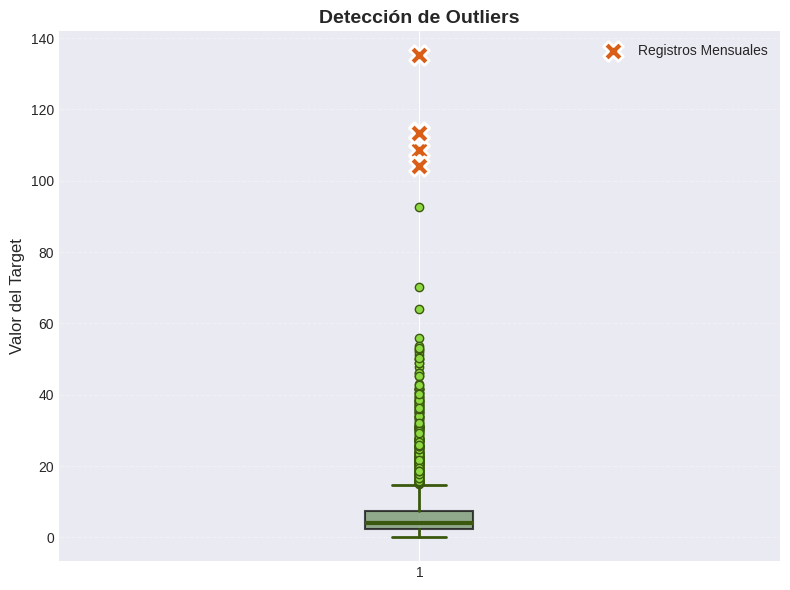

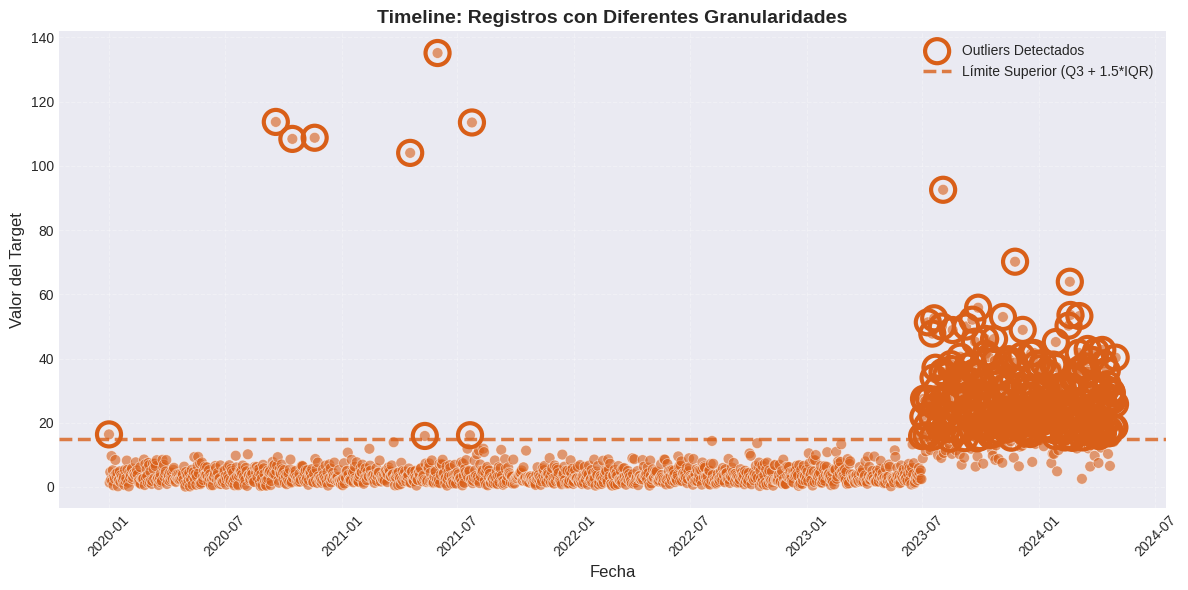

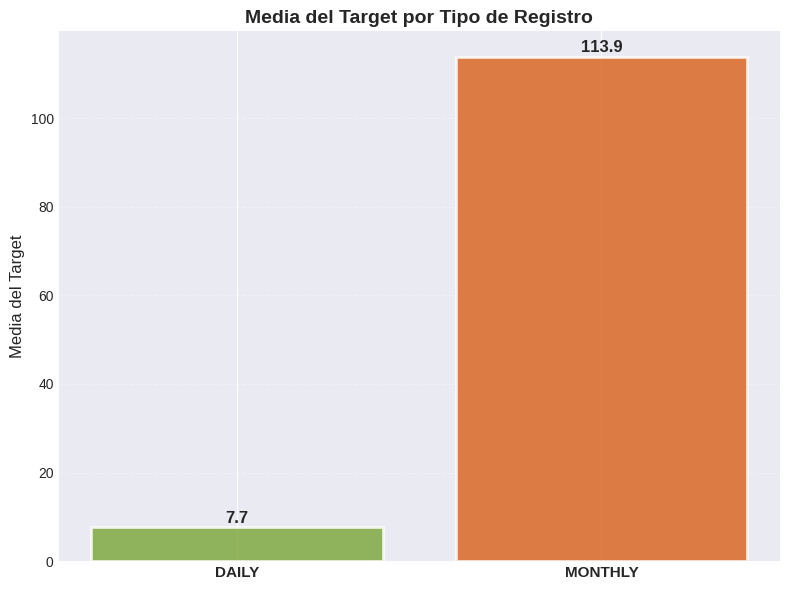

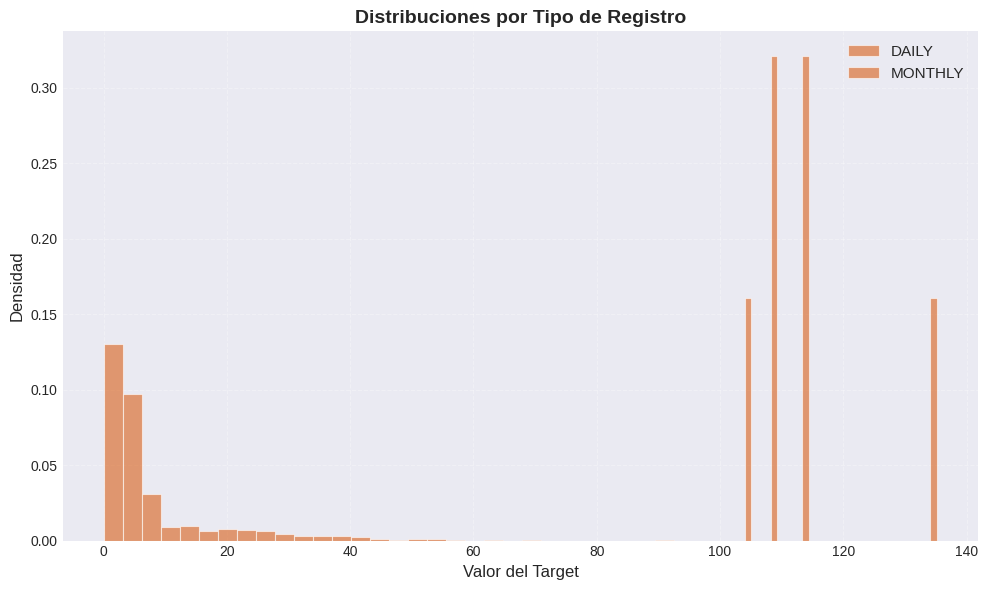


📊 DIAGNÓSTICO DE GRANULARIDAD

Total de registros: 1582
Registros DIARIOS: 0 (0.0%)
Registros MENSUALES: 0 (0.0%)

Media de registros DIARIOS: nan
Media de registros MENSUALES: nan
Ratio Mensual/Diario: nanx

Outliers detectados: 242
Outliers que son MENSUALES: 0

⚠️  CONCLUSIÓN:
Se detectaron registros con granularidad mixta.
Los valores mensuales son significativamente mayores que los diarios.

💡 RECOMENDACIÓN:
- Separar los datos por granularidad temporal
- Crear modelos independientes para cada tipo
- O normalizar todos los registros a una misma escala temporal


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def granularity_scanner_pro(df, target_col="target"):
    """
    Detector de registros con granularidad mixta (ej: diarios y mensuales mezclados).

    Parámetros:
    - df: DataFrame con los datos
    - target_col: nombre de la columna objetivo
    """

    # PALETA DE COLORES PERSONALIZADA
    COLOR_NORMAL = '#79A637'       # Verde medio - Registros normales/diarios
    COLOR_PROBLEMA = '#D95F18'     # Naranja - ÚNICO color de resaltado para problemas
    COLOR_BASE = '#3B590E'         # Verde oscuro - Color base/referencia
    COLOR_ACCENT = '#6A8C61'       # Verde grisáceo - Acento/complementario
    COLOR_SUAVE = '#8DD941'        # Verde claro - Elementos secundarios

    # Detectar outliers usando el método IQR (Rango Intercuartílico)
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers (valores fuera de los límites)
    outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)].copy()

    # VISUALIZACIÓN 1: Boxplot con outliers destacados
    plt.figure(figsize=(8, 6))
    bp = plt.boxplot(df[target_col], patch_artist=True,
                     boxprops=dict(facecolor=COLOR_ACCENT, alpha=0.7, linewidth=1.5),
                     medianprops=dict(color=COLOR_BASE, linewidth=3),
                     whiskerprops=dict(linewidth=2, color=COLOR_BASE),
                     capprops=dict(linewidth=2, color=COLOR_BASE),
                     flierprops=dict(marker='o', markerfacecolor=COLOR_SUAVE,
                                    markersize=6, markeredgecolor=COLOR_BASE))

    # Marcar outliers mensuales si existe columna 'record_type'
    if 'record_type' in df.columns:
        outliers_mensuales = outliers[outliers['record_type'] == 'MONTHLY']
        plt.scatter([1] * len(outliers_mensuales), outliers_mensuales[target_col],
                   color=COLOR_PROBLEMA, s=200, marker='X', zorder=5,
                   label='Registros Mensuales', edgecolors='white', linewidth=2)
        plt.legend(fontsize=10)

    plt.title('Detección de Outliers', fontsize=14, fontweight='bold')
    plt.ylabel('Valor del Target', fontsize=12)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN 2: Serie temporal con outliers
    plt.figure(figsize=(12, 6))

    # Asignar colores según tipo de registro
    if 'record_type' in df.columns:
        colors = [COLOR_NORMAL if t == 'DIARIO' else COLOR_PROBLEMA for t in df['record_type']]
    else:
        colors = COLOR_NORMAL

    plt.scatter(df['date'], df[target_col], c=colors, alpha=0.6, s=60,
               edgecolors='white', linewidth=0.5)

    # Resaltar outliers con círculos naranjas
    plt.scatter(outliers['date'], outliers[target_col],
               facecolors='none', edgecolors=COLOR_PROBLEMA, s=300, linewidth=3,
               label='Outliers Detectados')

    # Línea de límite superior
    plt.axhline(upper_bound, color=COLOR_PROBLEMA, linestyle='--', linewidth=2.5,
               alpha=0.8, label='Límite Superior (Q3 + 1.5*IQR)')

    plt.title('Timeline: Registros con Diferentes Granularidades', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Valor del Target', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3, linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN 3: Comparación de estadísticas por tipo
    if 'record_type' in df.columns:
        plt.figure(figsize=(8, 6))

        # Calcular estadísticas por tipo
        stats_data = df.groupby('record_type')[target_col].agg(['mean', 'std', 'count']).reset_index()
        x_pos = np.arange(len(stats_data))

        bars = plt.bar(x_pos, stats_data['mean'],
                      color=[COLOR_NORMAL, COLOR_PROBLEMA], alpha=0.8,
                      edgecolor='white', linewidth=2)

        plt.xticks(x_pos, stats_data['record_type'], fontsize=11, fontweight='bold')
        plt.title('Media del Target por Tipo de Registro', fontsize=14, fontweight='bold')
        plt.ylabel('Media del Target', fontsize=12)
        plt.grid(axis='y', alpha=0.3, linestyle='--')

        # Añadir valores sobre las barras
        for i, (bar, val) in enumerate(zip(bars, stats_data['mean'])):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{val:.1f}', ha='center', fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.show()

        # VISUALIZACIÓN 4: Distribuciones separadas por tipo
        plt.figure(figsize=(10, 6))

        for tipo in df['record_type'].unique():
            data = df[df['record_type'] == tipo][target_col]
            color = COLOR_NORMAL if tipo == 'DIARIO' else COLOR_PROBLEMA
            plt.hist(data, bins=30, alpha=0.6, label=tipo,
                    color=color, edgecolor='white', linewidth=0.8, density=True)

        plt.title('Distribuciones por Tipo de Registro', fontsize=14, fontweight='bold')
        plt.xlabel('Valor del Target', fontsize=12)
        plt.ylabel('Densidad', fontsize=12)
        plt.legend(fontsize=11)
        plt.grid(alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()

    # Imprimir diagnóstico en consola
    print("\n" + "="*60)
    print("📊 DIAGNÓSTICO DE GRANULARIDAD")
    print("="*60)
    print(f"\nTotal de registros: {len(df)}")

    if 'record_type' in df.columns:
        n_diarios = (df['record_type'] == 'DIARIO').sum()
        n_mensuales = (df['record_type'] == 'MENSUAL').sum()

        print(f"Registros DIARIOS: {n_diarios} ({n_diarios/len(df)*100:.1f}%)")
        print(f"Registros MENSUALES: {n_mensuales} ({n_mensuales/len(df)*100:.1f}%)")

        # Calcular ratio de medias
        media_diarios = df[df['record_type'] == 'DIARIO'][target_col].mean()
        media_mensuales = df[df['record_type'] == 'MENSUAL'][target_col].mean()
        ratio = media_mensuales / media_diarios

        print(f"\nMedia de registros DIARIOS: {media_diarios:.2f}")
        print(f"Media de registros MENSUALES: {media_mensuales:.2f}")
        print(f"Ratio Mensual/Diario: {ratio:.1f}x")

    print(f"\nOutliers detectados: {len(outliers)}")

    if 'record_type' in df.columns and len(outliers) > 0:
        mensuales_outliers = (outliers['record_type'] == 'MENSUAL').sum()
        print(f"Outliers que son MENSUALES: {mensuales_outliers}")

    if len(outliers) > 0:
        print("\n⚠️  CONCLUSIÓN:")
        print("Se detectaron registros con granularidad mixta.")
        print("Los valores mensuales son significativamente mayores que los diarios.")
        print("\n💡 RECOMENDACIÓN:")
        print("- Separar los datos por granularidad temporal")
        print("- Crear modelos independientes para cada tipo")
        print("- O normalizar todos los registros a una misma escala temporal")
    else:
        print("\n✓ No se detectaron problemas de granularidad.")

    print("="*60)

    return outliers


# EJECUTAR ANÁLISIS
print("Iniciando análisis de granularidad...")
print("Buscando registros con granularidades mixtas...\n")

outliers_found = granularity_scanner_pro(df.copy())

---

#### 🔧 Herramienta #3: change point hunter

<div style="background: linear-gradient(135deg, #6CC733 0%, #0A6F47 100%); padding: 25px; border-radius: 15px; color: white; margin: 20px 0;">

## 🎯 ¿Qué hace?

Encuentra el **momento exacto** donde tu distribución cambió estructuralmente.

### 📚 Paper de referencia:
**Truong et al. (2020)** - [Selective review of offline change point detection](https://arxiv.org/abs/2008.09524)

### ⚡ Algoritmo: PELT (Pruned Exact Linear Time)

**Detecta:**
- 📉 Cambios en media/varianza
- 🔄 Quiebres estructurales
- 💥 Eventos que dividieron tu timeline

</div>

### ⚡ UN SOLO CLICK para cazar:

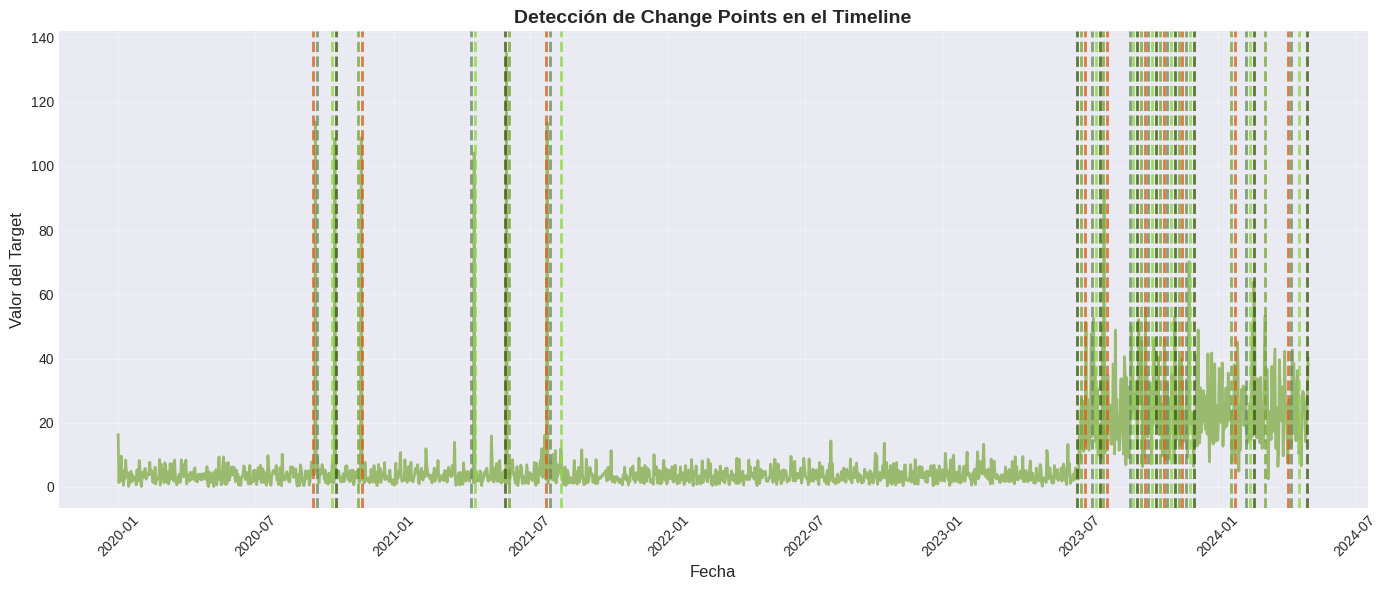

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

def change_point_hunter_pro(df, target_col="target", fecha_col="date", penalty=60):
    """
    Detector de change points (puntos de cambio estructural) en series temporales.

    Parámetros:
    - df: DataFrame con los datos
    - target_col: nombre de la columna objetivo
    - fecha_col: nombre de la columna de fecha
    - penalty: penalización para el algoritmo PELT (menor = más sensible)
    """

    signal = df[target_col].values

    # Detectar change points usando el algoritmo PELT
    algo = rpt.Pelt(model="l2").fit(signal)
    change_points = algo.predict(pen=penalty)

    # VISUALIZACIÓN: Serie temporal con change points marcados
    plt.figure(figsize=(14, 6))
    plt.plot(df[fecha_col], signal, color='#79A637', linewidth=2, alpha=0.7)

    # Marcar cada change point con línea vertical
    colors_cp = ['#D95F18', '#6A8C61', '#8DD941', '#3B590E', '#79A637']
    for i, cp in enumerate(change_points[:-1]):
        color = colors_cp[i % len(colors_cp)]
        plt.axvline(df[fecha_col].iloc[cp-1], color=color, linestyle='--',
                   linewidth=2, alpha=0.8)

    plt.title('Detección de Change Points en el Timeline', fontsize=14, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Valor del Target', fontsize=12)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return change_points


# EJECUTAR ANÁLISIS
change_points_found = change_point_hunter_pro(df.copy())